In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pycaret
# from supervised.automl import AutoML

In [2]:
data = pd.read_excel('database\data_train.xlsx')

In [ ]:
data.info()

In [ ]:
data.columns

In [ ]:
data

In [3]:
X = data[['latitude', 'longitude', 'tanggal', 'hari', 'bulan', 'tahun', 'hari_dalam_pekan',
       'pekan_ke', 'ALLSKY_SFC_SW_DWN',
       'ALLSKY_SFC_LW_DWN', 'CLOUD_AMT', 'TS', 'PRECTOTCORR', 'T10M',
       'T10M_MAX', 'T10M_MIN', 'WD10M', 'WS10M', 'WS10M_MAX', 'RH2M', 'QV2M',
       'TQV', 'PS', 'GWETTOP', 'PW', 'ALLSKY_KT']]

y = data['banjir']

# MLJAR supervised

In [28]:
# automl = AutoML(model_time_limit=1*60,
#                 eval_metric='auc',
#                 mode="Perform",
#                 golden_features=True,
#                 features_selection=True,
#                 stack_models=True,
#                 train_ensemble=True,
#                 explain_level=2,
#                 ml_task='binary_classification',
#                 kmeans_features=True,
#                 results_path='Model_1',
#                 validation_strategy={
#                     "validation_type": "kfold",
#                     "k_folds": 5,
#                     "shuffle": True,
#                     "stratify": True,
#                     "random_seed": 123
#                     },
#                 start_random_models=10,
#                 top_models_to_improve=3
#                 )

In [ ]:
# automl.fit(X, y)

In [6]:
automl = AutoML(results_path='Model_1')

# PANDAS PROFILING

In [ ]:
from pandas_profiling import ProfileReport

profile = ProfileReport(data, title="Pandas Profiling")

In [ ]:
profile

# TPOT

In [4]:
from tpot import TPOTClassifier

In [27]:
pipeline_optimizer = TPOTClassifier(generations=10, scoring='accuracy',
                                    cv=5, population_size=20, verbosity=2)

In [ ]:
pipeline_optimizer.fit(X_train, y_train)

In [ ]:
pipeline_optimizer.score(X_test, y_test)

In [16]:
pipeline_optimizer.export('tpot_exported_pipeline.py')

# PYCARET

In [4]:
from pycaret.classification import *
from pycaret.classification import load_model

In [5]:
model = setup(data=X, target=y, feature_selection=True, 
              feature_selection_method='sequential', multicollinearity_threshold=0.9,
              fold_strategy='kfold', fold=10, log_plots=True,
              log_profile=True, log_data=True, profile=True)

,Description,Value
0,Session id,2734
1,Target,banjir
2,Target type,Binary
3,Original data shape,"(4394, 27)"
4,Transformed data shape,"(4394, 6)"
5,Transformed train set shape,"(3075, 6)"
6,Transformed test set shape,"(1319, 6)"
7,Numeric features,25
8,Date features,1
9,Preprocess,True


Loading profile... Please Wait!


In [6]:
best_model = compare_models(sort='AUC', exclude='dummy', n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9317,0.9855,0.9278,0.9350,0.9311,0.8630,0.8635,0.6540
rf,Random Forest Classifier,0.9320,0.9854,0.9250,0.9387,0.9313,0.8637,0.8646,0.7760
xgboost,Extreme Gradient Boosting,0.9363,0.9848,0.9358,0.9368,0.9361,0.8721,0.8726,0.6900
gbc,Gradient Boosting Classifier,0.9356,0.9834,0.9349,0.9367,0.9355,0.8709,0.8714,0.7070
et,Extra Trees Classifier,0.9353,0.9823,0.9298,0.9400,0.9346,0.8702,0.8708,0.7340
ada,Ada Boost Classifier,0.9255,0.9783,0.9277,0.9241,0.9255,0.8507,0.8513,0.6960
knn,K Neighbors Classifier,0.9187,0.9639,0.9006,0.9344,0.9169,0.8369,0.8380,0.6270
qda,Quadratic Discriminant Analysis,0.8715,0.9476,0.8737,0.8730,0.8718,0.7432,0.7458,0.6770
nb,Naive Bayes,0.8588,0.9406,0.8722,0.8536,0.8610,0.7178,0.7209,0.6300
lr,Logistic Regression,0.8527,0.9342,0.8539,0.8535,0.8527,0.7052,0.7069,8.1740


In [7]:
best_model

[LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=2734, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
                subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='sqrt',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        n_estimators=100, n_jobs=-1, oob_score=False,
                        random_state=2734, verbose=0, warm_start=False),
 XGBClassifier(base_score=N

In [8]:
folds = [3, 5, 7, 10]

for fold in folds:
    xgb = create_model('xgboost', return_train_score=True, round=3, fold=fold)

In [9]:
folds = [3, 5, 7, 10]

for fold in folds:
    rf = create_model('rf', return_train_score=True, round=3, fold=fold)

In [10]:
folds = [3, 5, 7, 10]

for fold in folds:
    lgbm = create_model('lightgbm', rlgbmurn_train_score=True, round=3, fold=fold)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.929,0.981,0.926,0.932,0.929,0.858,0.858
1,0.928,0.981,0.920,0.934,0.927,0.856,0.856
2,0.939,0.985,0.951,0.927,0.939,0.877,0.877
Mean,0.932,0.982,0.932,0.931,0.932,0.863,0.864
Std,0.005,0.002,0.013,0.003,0.005,0.010,0.010


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.930,0.984,0.921,0.936,0.928,0.860,0.860
1,0.933,0.985,0.929,0.938,0.934,0.867,0.867
2,0.927,0.984,0.901,0.948,0.924,0.854,0.855
3,0.912,0.971,0.900,0.918,0.909,0.824,0.824
4,0.932,0.982,0.938,0.932,0.935,0.863,0.863
Mean,0.927,0.981,0.918,0.934,0.926,0.854,0.854
Std,0.008,0.005,0.015,0.010,0.009,0.015,0.015


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.934,0.985,0.917,0.947,0.932,0.868,0.869
1,0.943,0.985,0.952,0.940,0.946,0.886,0.886
2,0.932,0.978,0.916,0.934,0.925,0.862,0.862
3,0.943,0.989,0.920,0.967,0.943,0.886,0.887
4,0.895,0.967,0.886,0.903,0.894,0.790,0.791
5,0.941,0.990,0.922,0.957,0.940,0.882,0.882
6,0.941,0.981,0.942,0.942,0.942,0.881,0.881
Mean,0.933,0.982,0.922,0.942,0.932,0.865,0.865
Std,0.016,0.007,0.020,0.019,0.017,0.032,0.032


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.945,0.987,0.928,0.959,0.944,0.890,0.890
1,0.925,0.984,0.927,0.921,0.924,0.851,0.851
2,0.909,0.986,0.922,0.911,0.916,0.817,0.817
3,0.929,0.979,0.909,0.935,0.922,0.856,0.856
4,0.929,0.986,0.943,0.904,0.923,0.856,0.857
5,0.951,0.991,0.933,0.975,0.954,0.902,0.903
6,0.925,0.977,0.897,0.952,0.924,0.850,0.852
7,0.925,0.989,0.929,0.910,0.919,0.849,0.850
8,0.951,0.991,0.969,0.939,0.954,0.902,0.903


In [11]:
lgbm

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=2734, reg_alpha=0.0, reg_lambda=0.0,
               rlgbmurn_train_score=True, silent='warn', subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [12]:
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=2734, verbose=0, warm_start=False)

In [13]:
xgb

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...)

In [14]:
lgbm_tune = tune_model(lgbm, fold=fold, optimize='AUC', search_library='optuna', return_train_score=True)
rf_tune = tune_model(rf, fold=fold, optimize='AUC', search_library='optuna', return_train_score=True)
xgb_tune = tune_model(xgb, fold=fold, optimize='AUC', search_library='optuna', return_train_score=True)

[I 2023-06-21 22:53:40,788] Searching the best hyperparameters using 3075 samples...
[I 2023-06-21 22:54:46,482] Finished hyperparemeter search!


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


[I 2023-06-21 22:55:03,409] Searching the best hyperparameters using 3075 samples...
[I 2023-06-21 22:56:52,555] Finished hyperparemeter search!


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


[I 2023-06-21 22:57:12,698] Searching the best hyperparameters using 3075 samples...
[I 2023-06-21 22:58:24,491] Finished hyperparemeter search!


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [15]:
final_rf = finalize_model(rf)
final_lgbm = finalize_model(lgbm)
final_xgb = finalize_model(xgb)

In [23]:
print(final_rf)

Pipeline(memory=FastMemory(location=C:\Users\Acer\AppData\Local\Temp\joblib),
         steps=[('date_feature_extractor',
                 TransformerWrapper(exclude=None, include=['tanggal'],
                                    transformer=ExtractDateTimeFeatures(features=['day',
                                                                                  'month',
                                                                                  'year']))),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['latitude', 'longitude', 'hari',
                                             'bulan', 'tahun',
                                             'hari_dal...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                      

In [24]:
print(final_lgbm)

Pipeline(memory=FastMemory(location=C:\Users\Acer\AppData\Local\Temp\joblib),
         steps=[('date_feature_extractor',
                 TransformerWrapper(exclude=None, include=['tanggal'],
                                    transformer=ExtractDateTimeFeatures(features=['day',
                                                                                  'month',
                                                                                  'year']))),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['latitude', 'longitude', 'hari',
                                             'bulan', 'tahun',
                                             'hari_dal...
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                         

In [27]:
print(final_xgb)

Pipeline(memory=FastMemory(location=C:\Users\Acer\AppData\Local\Temp\joblib),
         steps=[('date_feature_extractor',
                 TransformerWrapper(exclude=None, include=['tanggal'],
                                    transformer=ExtractDateTimeFeatures(features=['day',
                                                                                  'month',
                                                                                  'year']))),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['latitude', 'longitude', 'hari',
                                             'bulan', 'tahun',
                                             'hari_dal...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                          

In [21]:
save_model(final_lgbm,'lgbm_model')
save_model(final_rf,'rf_model')
save_model(final_xgb,'xgb_model')

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\Acer\AppData\Local\Temp\joblib),
          steps=[('date_feature_extractor',
                  TransformerWrapper(exclude=None, include=['tanggal'],
                                     transformer=ExtractDateTimeFeatures(features=['day',
                                                                                   'month',
                                                                                   'year']))),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['latitude', 'longitude', 'hari',
                                              'bulan', 'tahun',
                                              'hari_dal...
                                grow_policy=None, importance_type=None,
                                interaction_constraints=None, learning_rate=None,
                                max_bin=None, max_cat_threshold=None,
            

In [64]:
get_leaderboard()

Processing:   0%|          | 0/33 [00:00<?, ?it/s]

,Model Name,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Index,,,,,,,,,
0,Logistic Regression,"(TransformerWrapper(exclude=None, include=['ta...",0.8527,0.9342,0.8539,0.8535,0.8527,0.7052,0.7069
1,K Neighbors Classifier,"(TransformerWrapper(exclude=None, include=['ta...",0.9187,0.9639,0.9006,0.9344,0.9169,0.8369,0.8380
2,Naive Bayes,"(TransformerWrapper(exclude=None, include=['ta...",0.8588,0.9406,0.8722,0.8536,0.8610,0.7178,0.7209
3,Decision Tree Classifier,"(TransformerWrapper(exclude=None, include=['ta...",0.9093,0.9096,0.9083,0.9099,0.9088,0.8181,0.8187
4,SVM - Linear Kernel,"(TransformerWrapper(exclude=None, include=['ta...",0.7067,0.0000,0.6062,0.8266,0.6508,0.4063,0.4445
5,Ridge Classifier,"(TransformerWrapper(exclude=None, include=['ta...",0.8497,0.0000,0.8681,0.8399,0.8521,0.6997,0.7030
6,Random Forest Classifier,"(TransformerWrapper(exclude=None, include=['ta...",0.9320,0.9854,0.9250,0.9387,0.9313,0.8637,0.8646
7,Quadratic Discriminant Analysis,"(TransformerWrapper(exclude=None, include=['ta...",0.8715,0.9476,0.8737,0.8730,0.8718,0.7432,0.7458
8,Ada Boost Classifier,"(TransformerWrapper(exclude=None, include=['ta...",0.9255,0.9783,0.9277,0.9241,0.9255,0.8507,0.8513


In [ ]:
folds = [3, 5, 7, 10]

for fold in folds:
    xgb = create_model('xgboost', return_train_score=True, round=3, fold=fold)

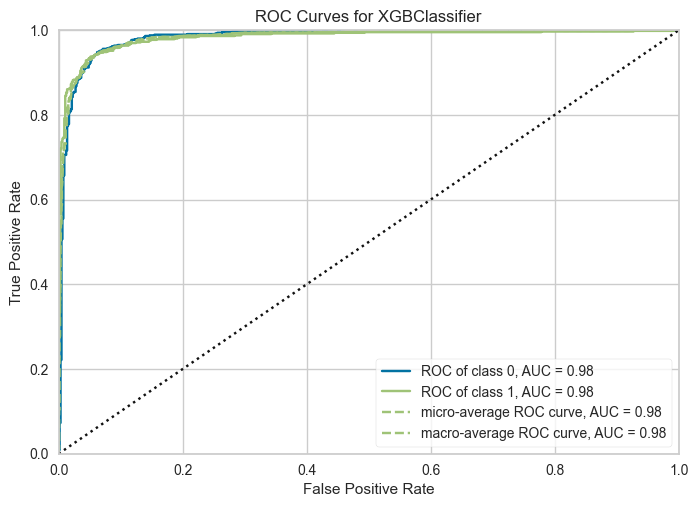

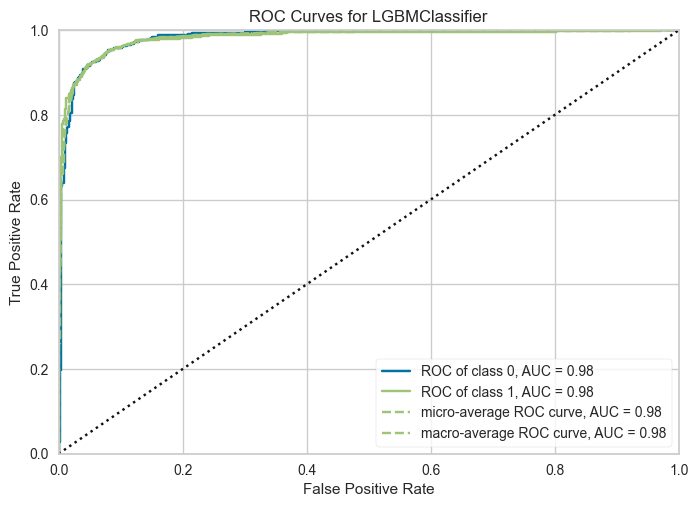

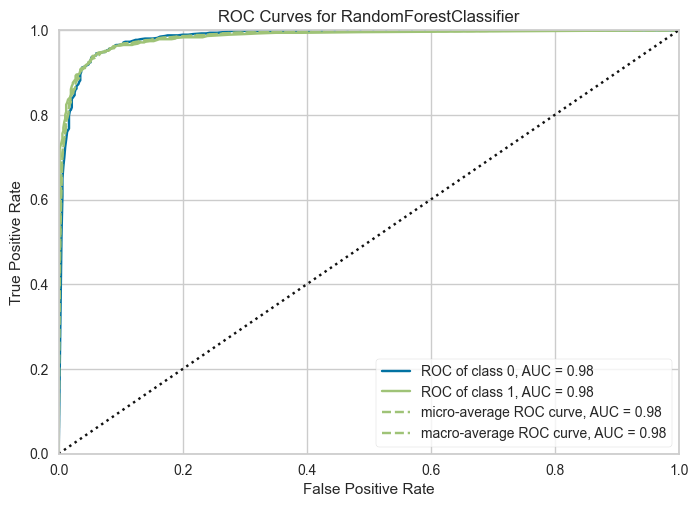

In [39]:
plot_model(xgb, plot='auc')
plot_model(lgbm, plot='auc')
plot_model(rf, plot='auc')

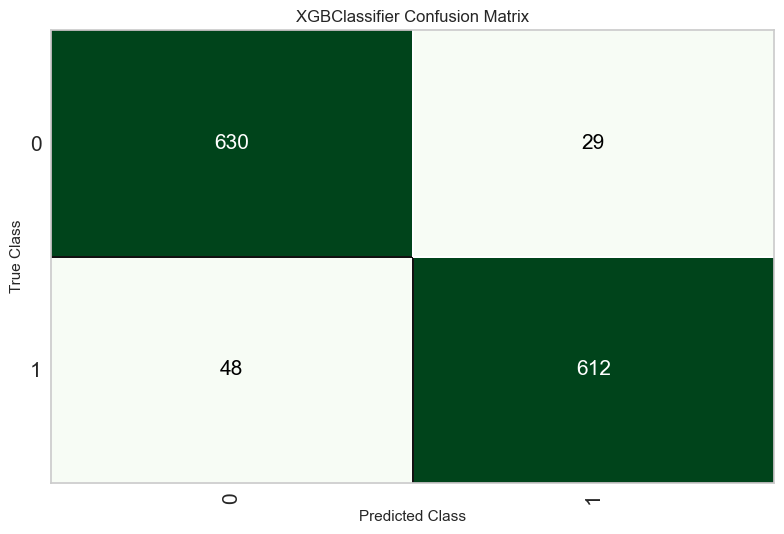

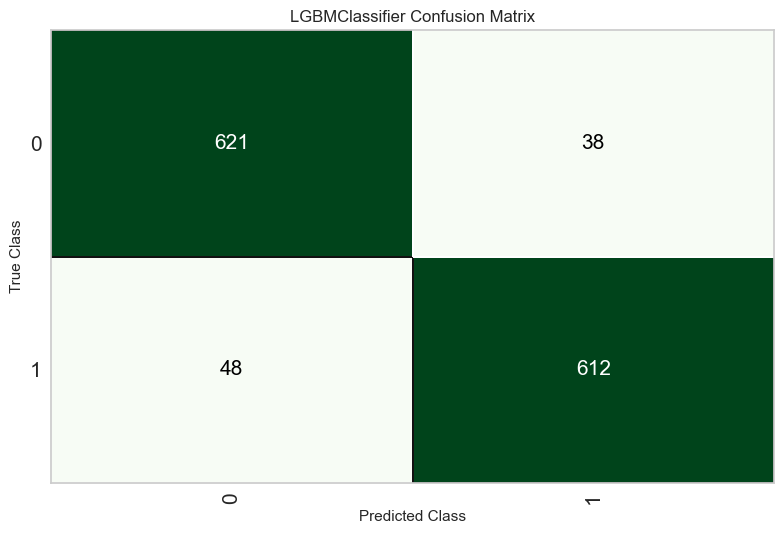

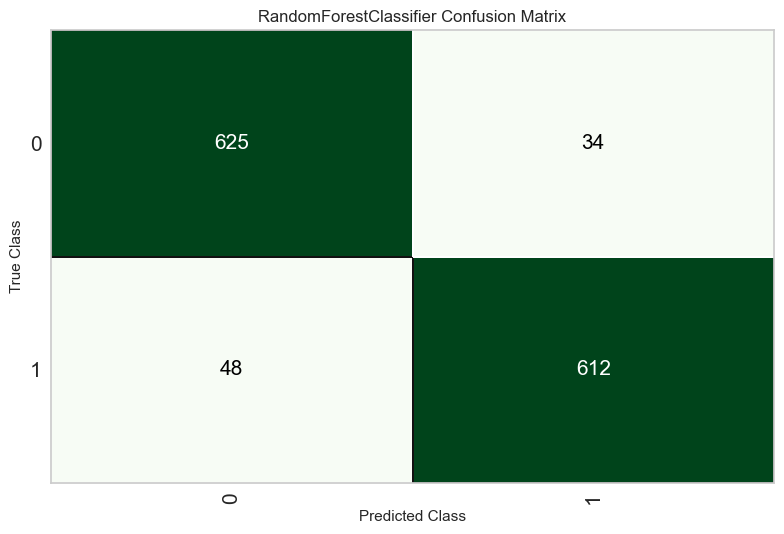

In [40]:
plot_model(xgb, plot='confusion_matrix')
plot_model(lgbm, plot='confusion_matrix')
plot_model(rf, plot='confusion_matrix')

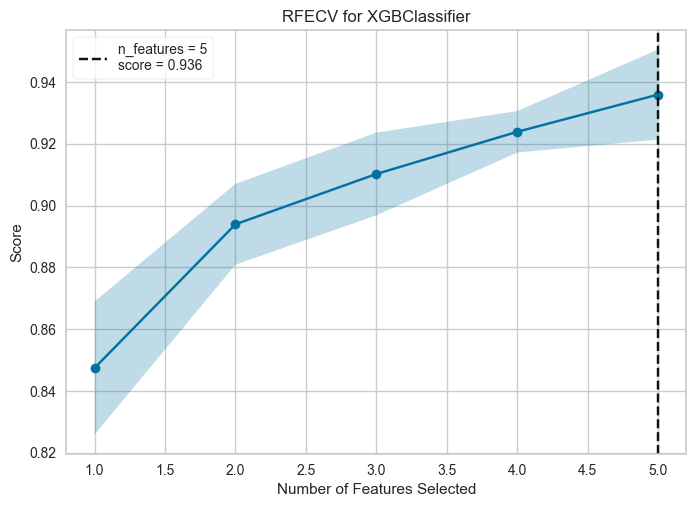

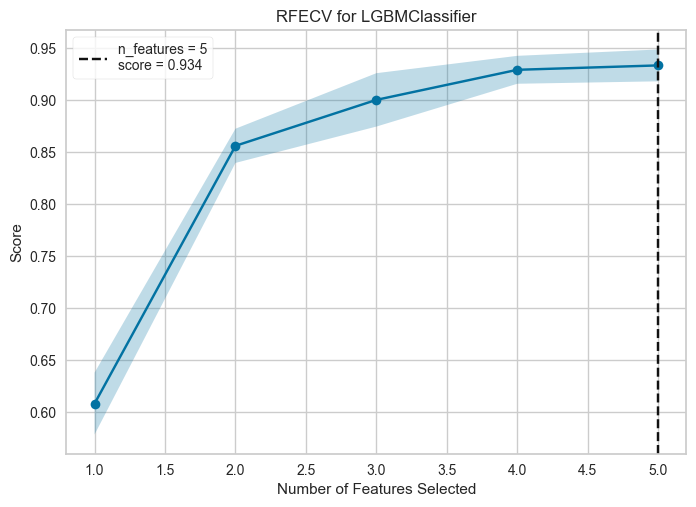

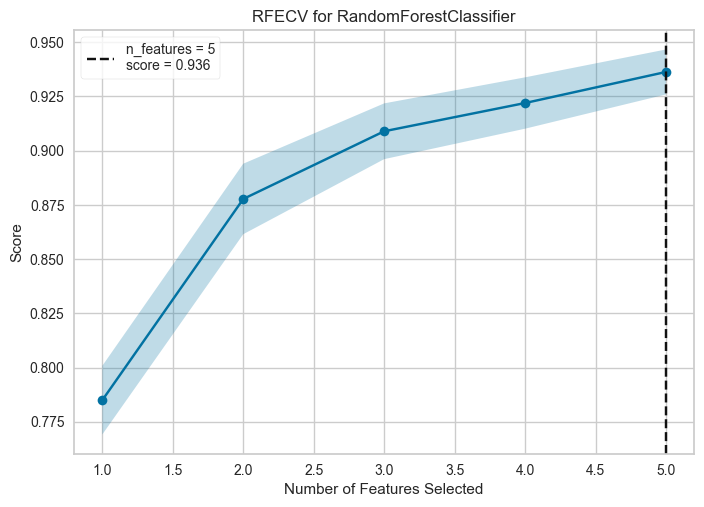

In [47]:
plot_model(xgb, plot='rfe')
plot_model(lgbm, plot='rfe')
plot_model(rf, plot='rfe')

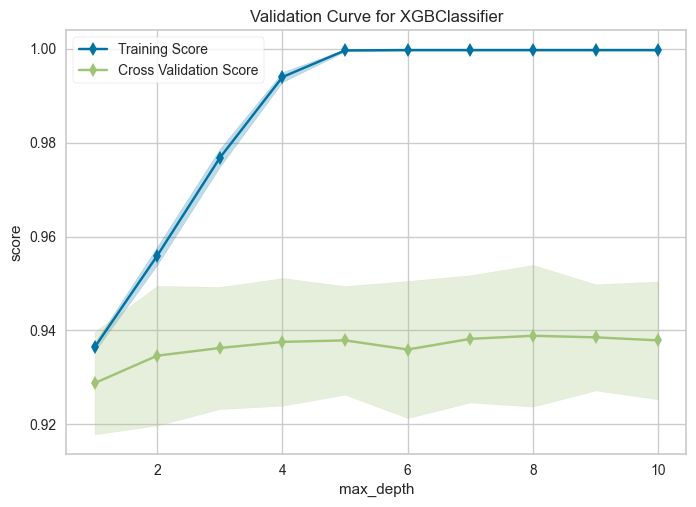

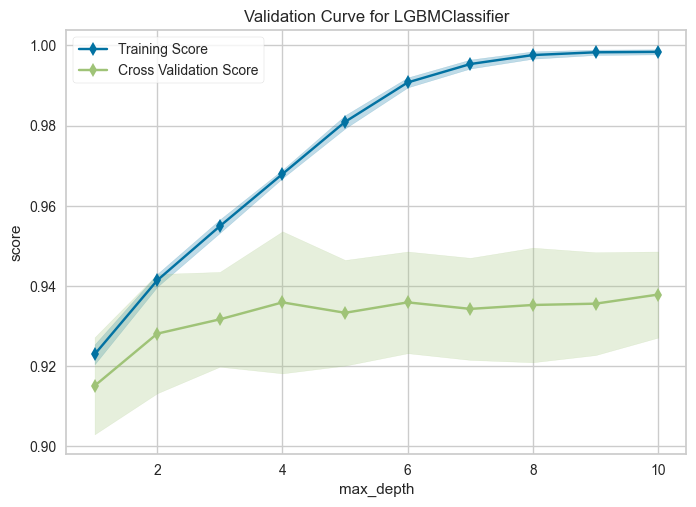

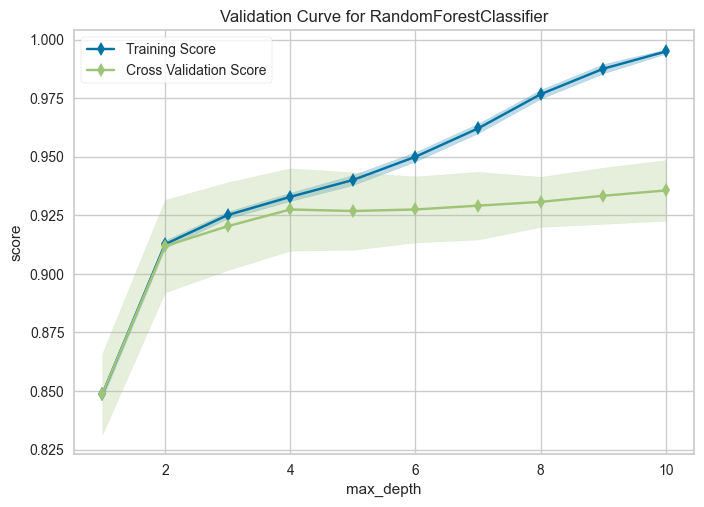

In [50]:
plot_model(xgb, plot='vc')
plot_model(lgbm, plot='vc')
plot_model(rf, plot='vc')

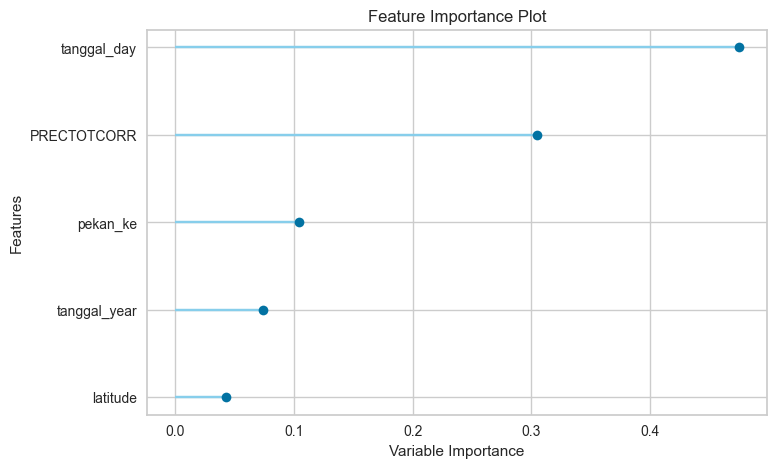

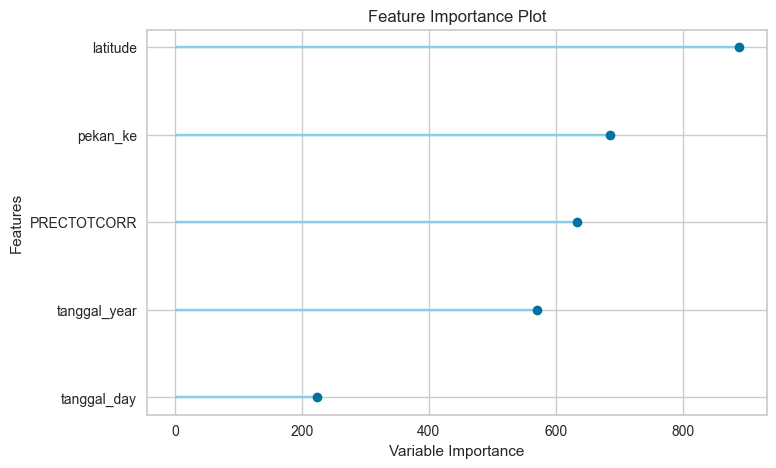

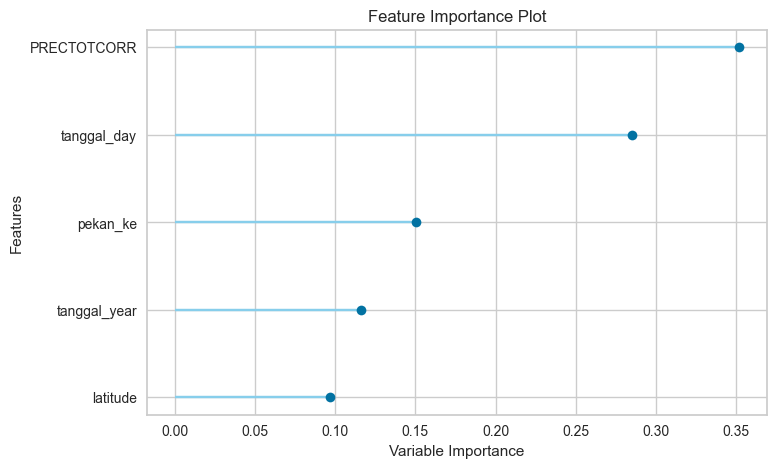

In [53]:
plot_model(xgb, plot='feature')
plot_model(lgbm, plot='feature')
plot_model(rf, plot='feature')

In [ ]:
best = compare_models(sort='AUC')

In [ ]:
# Mulai loop
models = []
results = []

fold_values = [3, 5, 7, 10]  # Nilai 'fold' yang akan digunakan

for fold in fold_values:
    model = compare_models(sort='AUC', return_train_score=True, fold=fold)
    model_results = pull().loc[['Mean']]
    models.append(model)
    results.append(model_results)

results = pd.concat(results, axis=0)
results.index = fold_values
results.plot()

In [ ]:
models()

In [ ]:
# model = load_model('ExtraTreesClassifier.pkl')

In [ ]:
best = compare_models(sort='AUC', return_train_score=True, fold=i)

In [ ]:
best

In [77]:
best_auc_model = automl(optimize = 'AUC')

In [ ]:
best_auc_model

In [ ]:
best = tune_model(best, n_iter=200)

In [ ]:
evaluate_model(best)

In [ ]:
plot_model(best, plot='pipeline')

In [22]:
plot_model(best, plot='auc', save=True)

'AUC.png'

In [26]:
plot_model(best, plot='confusion_matrix', save=True)

'Confusion Matrix.png'

In [25]:
plot_model(best, plot='rfe', save=True)

'Feature Selection.png'

In [ ]:
plot_model(lgbm, plot='feature_all')

In [ ]:
plot_model(lgbm, plot='parameter')

In [ ]:
plot_model(rf, plot='vc')

In [ ]:
save_model(best, 'ExtraTreesClassifier')

In [ ]:
ensemble1 = ensemble_model(best, method = 'Bagging', n_estimators=3,
                           choose_better=True, optimize='AUC')